In [8]:
# Importing libraries and packages:

from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.cross_validation import cross_val_score
from sklearn import preprocessing
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [9]:
#Problem a
cancer_df = pd.read_csv('Heart_short.csv')

# checking the dataset by printing every 10 lines:
cancer_df.head()

,Age,RestBP,Chol,RestECG,MaxHR,Oldpeak,AHD
0,63,145,233,2,150,2.3,No
1,67,160,286,2,108,1.5,Yes
2,67,120,229,2,129,2.6,Yes
3,37,130,250,0,187,3.5,No
4,41,130,204,2,172,1.4,No


In [26]:
def categorical_to_numeric(x):
    if x == 'No':
        return 0
    elif x == 'Yes':
        return 1
cancer_df['AHD'] = cancer_df['AHD'].apply(categorical_to_numeric)

In [27]:
#Problem b
feature_cols = ['Age','RestBP','Chol','RestECG','MaxHR','Oldpeak']

# use the above list to select the features from the original DataFrame
X = cancer_df[feature_cols] 
#normalization
X = preprocessing.scale(X)
# select a Series of labels (the last column) from the DataFrame
y = cancer_df['AHD']

# print the first 5 rows
print(X)
print(y.head())

[[ 0.94788279  0.74978425 -0.25859799  1.04743633 -0.00919313  1.13182982]
 [ 1.38542704  1.59842565  0.75330422  1.04743633 -1.84813139  0.43550978]
 [ 1.38542704 -0.6646181  -0.33496796  1.04743633 -0.92866226  1.39294984]
 ..., 
 [ 0.29156641 -0.09885716 -2.20603242 -0.96851989 -1.54164168  0.17438976]
 [ 0.29156641 -0.09885716 -0.2013205   1.04743633  1.04162873 -0.8700903 ]
 [-1.78676878  0.35375159 -1.36596267 -0.96851989  0.99784448 -0.8700903 ]]
0    0
1    1
2    1
3    0
4    0
Name: AHD, dtype: int64


In [28]:
#Problem c
# Randomly splitting the original dataset into training set and testing set:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

# print the size of the traning set:
print(X_train.shape)
print(y_train.shape)

# print the size of the testing set:
print(X_test.shape)
print(y_test.shape)

(224, 6)
(224,)
(57, 6)
(57,)


In [29]:
#Problem d
# "my_logreg" is instantiated as an "object" of LogisticRegression "class". 
my_logreg = LogisticRegression()
# Training ONLY on the training set:
my_logreg.fit(X_train, y_train)
# Testing on the testing set:
y_predict_lr = my_logreg.predict(X_test)
print(y_predict_lr)
# We can now compare the "predicted labels" for the Testing Set with its "actual labels" to evaluate the accuracy 

score_lr = accuracy_score(y_test, y_predict_lr)

print(score_lr)


[1 0 1 1 0 0 0 0 1 0 1 0 1 1 0 0 1 0 1 1 0 0 1 0 1 0 0 1 0 0 1 1 1 0 0 1 1
 0 1 1 0 1 0 0 1 1 0 0 1 0 0 1 0 1 0 0 0]
0.701754385965


In [30]:
#Problem e
# Estimating the probability (likelihood) of Each Label: 
y_predict_prob_lr = my_logreg.predict_proba(X_test)

# This line prints the "estimated likelihood of label=1" for the testing set:
print(y_predict_prob_lr[:,1])

[ 0.50102546  0.44866578  0.56968509  0.61880501  0.14912372  0.23815782
  0.2450554   0.12969191  0.65523956  0.35138608  0.90041243  0.08129492
  0.71340004  0.5471148   0.32067845  0.13624307  0.89035019  0.34007876
  0.89394678  0.65044747  0.1260156   0.14429784  0.76590559  0.06775119
  0.87865977  0.42501833  0.29333296  0.56382476  0.33445983  0.20265605
  0.70266925  0.86865072  0.83743209  0.12011109  0.20825064  0.98822841
  0.93945121  0.24304704  0.8040581   0.51841253  0.30234292  0.71135238
  0.32218759  0.18056311  0.97041773  0.68476137  0.12500001  0.13377015
  0.64598572  0.36395134  0.38959662  0.80220778  0.03786847  0.77813521
  0.12824011  0.1834758   0.10598781]


In [31]:
from sklearn import metrics

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predict_prob_lr[:,1], pos_label=1)

print(fpr)
print(tpr)
# AUC:
AUC = metrics.auc(fpr, tpr)
print(AUC)

[ 0.          0.03333333  0.03333333  0.13333333  0.13333333  0.2         0.2
  0.26666667  0.26666667  0.4         0.4         0.5         0.5
  0.53333333  0.53333333  0.63333333  0.63333333  0.7         0.7
  0.73333333  0.73333333  0.76666667  0.76666667  0.8         0.8         1.        ]
[ 0.03703704  0.03703704  0.40740741  0.40740741  0.62962963  0.62962963
  0.66666667  0.66666667  0.7037037   0.7037037   0.74074074  0.74074074
  0.77777778  0.77777778  0.81481481  0.81481481  0.85185185  0.85185185
  0.88888889  0.88888889  0.92592593  0.92592593  0.96296296  0.96296296
  1.          1.        ]
0.753086419753


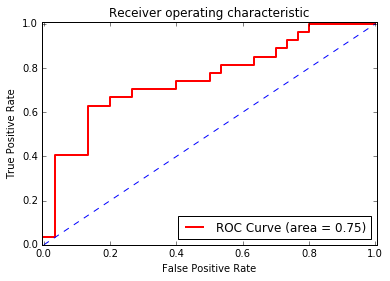

In [32]:
# Importing the "pyplot" package of "matplotlib" library of python to generate 
# graphs and plot curves:
import matplotlib.pyplot as plt

# The following line will tell Jupyter Notebook to keep the figures inside the explorer page 
# rather than openng a new figure window:
%matplotlib inline

plt.figure()

# Roc Curve:
plt.plot(fpr, tpr, color='red', lw=2, 
         label='ROC Curve (area = %0.2f)' % AUC)

# Random Guess line:
plt.plot([0, 1], [0, 1], color='blue', lw=1, linestyle='--')

# Defining The Range of X-Axis and Y-Axis:
plt.xlim([-0.005, 1.005])
plt.ylim([0.0, 1.01])

# Labels, Title, Legend:
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

plt.show()